Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Answer: For example, if the government agency wants to predict noisy neighborhoods and figure out which features attribute the most to noise complaints, such as the number of bars and restaurants, income level, age group, or construction sites, etc. In this case, the interpretability is more important since the government needs to identify the influence of different features and use the result to facilitate policy-making.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Answer: For example, using machine learning methods to analyze transportation images and to identify congestion and accidents. In this case, accuracy is more important considering immediate and effective emergency operations and traffic control.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Answer: One way is to calculate variable importance, for example, Gini importance which calculates the mean of weighted impurity decreases for all nodes on a variable. Another method is to train a single decision tree using the predictions of random forest as the target. Use the single decision tree as an interpretable proxy of random forest model.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(999)

In [3]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [4]:
df.groupby('MPG').size()

MPG
bad     15
good     5
dtype: int64

The most common MPG value is BAD.

In [5]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [6]:
def calMPG(df):
    try:
        good = df.groupby('MPG').size()['good']
    except KeyError:
        good = 0  
    try:
        bad = df.groupby('MPG').size()['bad']
    except KeyError:
        bad = 0
    return good, bad

In [7]:
goodY, badY = calMPG(df[(df['cylinders'] == 4)])
goodN, badN = calMPG(df[(df['cylinders'] != 4)])
gain_c4 = InformationGain(goodY,badY,goodN,badN)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))
print('information gain when cylinders = 4 is %.3f'%gain_c4)

Y:5 good 4 bad
N:0 good 11 bad
information gain when cylinders = 4 is 0.365


In [8]:
goodY, badY = calMPG(df[(df['cylinders'] == 6)])
goodN, badN = calMPG(df[(df['cylinders'] != 6)])
gain_c6 = InformationGain(goodY,badY,goodN,badN)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))
print('information gain when cylinders = 6 is %.3f'%gain_c6)

Y:0 good 6 bad
N:5 good 9 bad
information gain when cylinders = 6 is 0.153


In [9]:
goodY, badY = calMPG(df[(df['cylinders'] == 8)])
goodN, badN = calMPG(df[(df['cylinders'] != 8)])
gain_c8 = InformationGain(goodY,badY,goodN,badN)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))
print('information gain when cylinders = 6 is %.3f'%gain_c8)

Y:0 good 5 bad
N:5 good 10 bad
information gain when cylinders = 6 is 0.123


In [10]:
goodY, badY = calMPG(df[(df['weight'] == 'light')])
goodN, badN = calMPG(df[(df['weight'] != 'light')])
gain_wl = InformationGain(goodY,badY,goodN,badN)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))
print('information gain when weight = light is %.3f'%gain_wl)

Y:3 good 3 bad
N:2 good 12 bad
information gain when weight = light is 0.097


In [11]:
goodY, badY = calMPG(df[(df['weight'] == 'medium')])
goodN, badN = calMPG(df[(df['weight'] != 'medium')])
gain_wm = InformationGain(goodY,badY,goodN,badN)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))
print('information gain when weight = medium is %.3f'%gain_wm)

Y:2 good 6 bad
N:3 good 9 bad
information gain when weight = medium is 0.000


In [12]:
goodY, badY = calMPG(df[(df['weight'] == 'weighty')])
goodN, badN = calMPG(df[(df['weight'] != 'weighty')])
gain_wh = InformationGain(goodY,badY,goodN,badN)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))
print('information gain when weight = heavy is %.3f'%gain_wh)

Y:0 good 6 bad
N:5 good 9 bad
information gain when weight = heavy is 0.153


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [13]:
df = df.sort_values(by = 'HP')
df = df.reset_index(drop=True)

In [14]:
df

,MPG,cylinders,HP,weight
0,good,4,65,light
1,good,4,75,light
2,good,4,81,light
3,bad,6,85,medium
4,good,4,89,medium
5,bad,6,90,medium
6,good,4,92,medium
7,bad,4,93,light
8,bad,4,94,light
9,bad,6,95,medium


In [15]:
gain_HP = []
for i in range(len(df)-1):
    if df['HP'][i] == df['HP'][i+1]:
        gain_HP.append(0)
    else:
        goodN, badN = calMPG(df.iloc[0:i+1,:])
        goodY, badY = calMPG(df.iloc[i+1:len(df)+1,:])
        gain_HP.append(InformationGain(goodY,badY,goodN,badN))
        print('information gain when HP > %.1f is %.3f'%((df['HP'][i] + df['HP'][i+1]) / 2.0, gain_HP[i]))

information gain when HP > 70.0 is 0.106
information gain when HP > 78.0 is 0.226
information gain when HP > 83.0 is 0.367
information gain when HP > 87.0 is 0.214
information gain when HP > 89.5 is 0.366
information gain when HP > 91.0 is 0.276
information gain when HP > 92.5 is 0.509
information gain when HP > 93.5 is 0.430
information gain when HP > 94.5 is 0.365
information gain when HP > 97.5 is 0.223
information gain when HP > 105.0 is 0.153
information gain when HP > 124.5 is 0.123
information gain when HP > 142.0 is 0.094
information gain when HP > 157.5 is 0.068
information gain when HP > 172.5 is 0.044
information gain when HP > 182.5 is 0.021


In [16]:
# find the split has the largest information gain for the real-valued variable HP
index = gain_HP.index(max(gain_HP))
gain_maxHP = (df['HP'][index] + df['HP'][index+1]) / 2.0
goodN, badN = calMPG(df.iloc[0:index+1,:])
goodY, badY = calMPG(df.iloc[index+1:len(df)+1,:])
print('information gain when HP > %.1f is %.3f'%(gain_maxHP,gain_HP[index]))
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))

information gain when HP > 92.5 is 0.509
Y:0 good 13 bad
N:5 good 2 bad


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

The optimal binary split of the data is HP>92.5, which has the largest information gain. Of the two child nodes created by this split, group N would require further partitioning. 

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [17]:
df1 = df.iloc[0:index+1,:]
df1

,MPG,cylinders,HP,weight
0,good,4,65,light
1,good,4,75,light
2,good,4,81,light
3,bad,6,85,medium
4,good,4,89,medium
5,bad,6,90,medium
6,good,4,92,medium


In [18]:
goodY, badY = calMPG(df1[(df1['cylinders'] == 4)])
goodN, badN = calMPG(df1[(df1['cylinders'] != 4)])
gain_c4 = InformationGain(goodY,badY,goodN,badN)
print('information gain when cylinders = 4 is %.3f'%gain_c4)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))

information gain when cylinders = 4 is 0.863
Y:5 good 0 bad
N:0 good 2 bad


In [19]:
goodY, badY = calMPG(df1[(df1['weight'] == 'light')])
goodN, badN = calMPG(df1[(df1['weight'] != 'light')])
gain_wl = InformationGain(goodY,badY,goodN,badN)
print('information gain when weight = light is %.3f'%gain_wl)
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))

information gain when weight = light is 0.292
Y:3 good 0 bad
N:2 good 2 bad


In [20]:
gain_HP = []
for i in range(len(df1)-1):
    if df1['HP'][i] == df1['HP'][i+1]:
        gain_HP.append(0)
    else:
        goodN, badN = calMPG(df1.iloc[0:i+1,:])
        goodY, badY = calMPG(df1.iloc[i+1:len(df1)+1,:])
        gain_HP.append(InformationGain(goodY,badY,goodN,badN)) 
        print('information gain when HP > %.1f is %.3f'%((df['HP'][i] + df['HP'][i+1]) / 2.0, gain_HP[i]))

information gain when HP > 70.0 is 0.076
information gain when HP > 78.0 is 0.170
information gain when HP > 83.0 is 0.292
information gain when HP > 87.0 is 0.006
information gain when HP > 89.5 is 0.062
information gain when HP > 91.0 is 0.076


In [21]:
# find the split has the largest information gain for the real-valued variable HP
index = gain_HP.index(max(gain_HP))
gain_maxHP = (df['HP'][index] + df['HP'][index+1]) / 2.0
print('information gain when HP > %.1f is %.3f'%(gain_maxHP,gain_HP[index]))
goodN, badN = calMPG(df1.iloc[0:index+1,:])
goodY, badY = calMPG(df1.iloc[index+1:len(df1)+1,:])
print('Y:%.0f good %.0f bad'%(goodY, badY))
print('N:%.0f good %.0f bad'%(goodN, badN))

information gain when HP > 83.0 is 0.292
Y:2 good 2 bad
N:3 good 0 bad


The optimal binary split of the data is cylinders = 4, which has the largest information gain. Since the training data points are perfectly classified, we do not need further partitioning.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

![title1](decision_tree1.png)

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

bad,8,70,light

bad,6,113,medium

good,4,83,weighty

bad,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [22]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = data.loc[:,"BurdenOfDisease"]
X = data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]

In [24]:
# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
X_train.head()

,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate
7,1.0,0.00,66,0.85149,0.97030,0.99010,0.99010,0.064,0.475,0.002,533,19930,0.94653,0.95545
53,1.0,8.04,317000,0.82178,0.82178,0.59406,0.85149,0.048,0.826,0.032,44,6198,0.97822,0.97525
15,1.0,4.19,9345,0.89109,0.99010,0.24752,0.56436,0.056,0.582,0.029,135,7344,0.79010,0.81584
36,0.4,0.12,25183,0.28713,0.82178,0.22772,0.42574,0.040,0.183,0.151,1,382,0.64851,0.54554
12,1.0,2.87,45564,0.59406,0.85149,0.69307,0.64356,0.031,0.835,0.186,9,2035,0.46535,0.33663


In [25]:
# use a single train/test split
OS=[]
for i in range(1,101,5):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

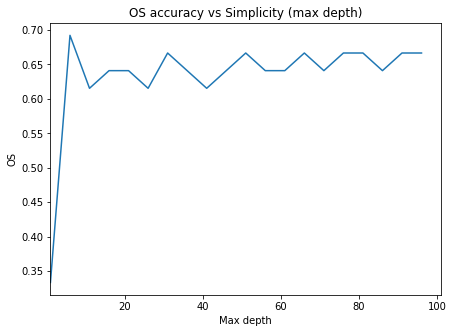

In [26]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(1,101,5),OS)
plt.xlabel("Max depth")
plt.ylabel("OS")
plt.title("OS accuracy vs Simplicity (max depth)")
plt.xlim(1,101)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [27]:
from sklearn.model_selection import GridSearchCV
# still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print rs.best_params_
print rs.score(X_test,y_test)

{'max_depth': 7}
0.615384615385


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [28]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="AdultLtrcyRate <= 0.856, samples = 91, value = [17, 25, 26, 23], class = low", fillcolor="#399de504"] ;
1 [label="GDPPCptaIntDol <= 1094.0, samples = 48, value = [17, 22, 1, 8], class = high", fillcolor="#47e53929"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 9, value = [9, 0, 0, 0], class = awful", fillcolor="#e58139ff"] ;
1 -> 2 ;
3 [label="samples = 39, value = [8, 22, 1, 8], class = high", fillcolor="#47e53973"] ;
1 -> 3 ;
4 [label="SustAccImprSanUrb <= 0.842, samples = 43, value = [0, 3, 25, 15], class = low", fillcolor="#399de55b"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 12, value = [0, 2, 1, 9], class = medium", fillcolor="#d739e5b2"] ;
4 -> 5 ;
6 [label="samples = 31, value = [0, 1, 24, 6], class = low", fillcolor="#399de5b8"] ;
4 -> 6 ;
}


Visualize the resulting output from http://www.webgraphviz.com

![title2](webgraphviz.png) 

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(1,51,5)}
rf = RandomForestClassifier(n_jobs=-1,max_depth=7)
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(X_train,y_train)
print rs.best_params_
print rs.score(X_test,y_test)

{'n_estimators': 31}
0.769230769231


The out of sample prediction result using random forest is around 0.769. Comparing to the out of sample prediction value of 0.615 for decision tree model, the accuracy is improved.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

From the results, I found that the accuracy of random forest model is better than decision tree model when we use the same maximum tree depth for both models. A single desition tree is easy to interpret as shown in the picture above. However, it is difficult to interpret and visualize results of random forest model which contains a number of trees. Feature importance in scikit learn allow us to evaluate the relative importance of different features. We can also calculate Gini importance or train a single decision tree using the predictions of random forest model.